In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./makeDataset/dataset/weighted_dataset_laewon.csv')

In [5]:
df

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,0,서울특별시,종로구,2010,229549.268115,23.821887,17.377856,1801.730472,1040.677152,1453.458910,520.926169,29164,188509.228860,서울특별시 종로구
1,1,서울특별시,중구,2010,204546.574665,21.131887,16.026767,1846.473195,918.489545,1482.515046,508.980782,19628,169871.679044,서울특별시 중구
2,2,서울특별시,용산구,2010,285037.439837,25.560929,18.278137,2684.174662,1209.250527,2024.434527,617.587174,37318,237447.825313,서울특별시 용산구
3,3,서울특별시,성동구,2010,329990.158999,33.890373,21.663249,3057.142964,1318.983040,2370.085765,723.184943,51562,272641.264253,서울특별시 성동구
4,4,서울특별시,광진구,2010,383983.213785,42.064709,23.632121,3496.641778,1369.978944,2688.029743,828.087144,67422,313466.614863,서울특별시 광진구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2894,경상남도,함양군,2022,69779.278813,17.962359,16.372977,247.997533,851.146943,205.559920,120.703081,4135,60416.879228,경상남도 함양군
2895,2895,경상남도,거창군,2022,89519.047044,20.948462,19.204026,333.050759,974.181286,268.751666,150.709757,8548,76603.424826,경상남도 거창군
2896,2896,경상남도,합천군,2022,80459.783572,20.276910,19.161986,292.276402,1057.517237,227.351743,141.087461,3385,70653.241497,경상남도 합천군
2897,2897,제주특별자치도,제주시,2022,382957.723705,62.007830,58.193346,2098.665754,2662.013987,1557.017041,862.771087,84346,318429.480836,제주특별자치도 제주시


In [6]:
data = df

In [7]:
use_cols = ['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)']

In [8]:
df['행정구역'].value_counts()

행정구역
서울특별시 종로구       13
전라북도 장수군        13
충청남도 예산군        13
충청남도 태안군        13
전라북도 전주시        13
                ..
경기도 동두천시        13
경기도 안산시         13
경기도 고양시         13
경기도 과천시         13
제주특별자치도 서귀포시    13
Name: count, Length: 223, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

In [10]:
# 연도가 2013부터 2020까지인 데이터 추출
filtered_df = df[(df['연도'] >= 2010) & (df['연도'] <= 2022)]

# 결과 출력
print(filtered_df)

      Unnamed: 0 행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수  \
0              0    서울특별시       종로구  2010  0.234001  0.120986  0.164052   
1              1    서울특별시        중구  2010  0.207489  0.102724  0.147483   
2              2    서울특별시       용산구  2010  0.292838  0.132791  0.175092   
3              3    서울특별시       성동구  2010  0.340503  0.189337  0.216603   
4              4    서울특별시       광진구  2010  0.397755  0.244829  0.240747   
...          ...      ...       ...   ...       ...       ...       ...   
2894        2894     경상남도       함양군  2022  0.064588  0.081208  0.151729   
2895        2895     경상남도       거창군  2022  0.085519  0.101479  0.186446   
2896        2896     경상남도       합천군  2022  0.075913  0.096920  0.185930   
2897        2897  제주특별자치도       제주시  2022  0.396668  0.380215  0.664569   
2898        2898  제주특별자치도      서귀포시  2022  0.258407  0.304942  0.558342   

          출생건수      사망건수      혼인건수      이혼건수   학령인구(명)   총인구수-학령인구(명)  \
0     0.186983  0.191544  

In [11]:
filtered_df

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,0,서울특별시,종로구,2010,0.234001,0.120986,0.164052,0.186983,0.191544,0.218938,0.254776,0.116964,188509.228860,서울특별시 종로구
1,1,서울특별시,중구,2010,0.207489,0.102724,0.147483,0.191679,0.167727,0.223411,0.248713,0.077754,169871.679044,서울특별시 중구
2,2,서울특별시,용산구,2010,0.292838,0.132791,0.175092,0.279591,0.224403,0.306820,0.303841,0.150492,237447.825313,서울특별시 용산구
3,3,서울특별시,성동구,2010,0.340503,0.189337,0.216603,0.318732,0.245792,0.360022,0.357443,0.209060,272641.264253,서울특별시 성동구
4,4,서울특별시,광진구,2010,0.397755,0.244829,0.240747,0.364855,0.255732,0.408958,0.410691,0.274273,313466.614863,서울특별시 광진구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2894,경상남도,함양군,2022,0.064588,0.081208,0.151729,0.023927,0.154601,0.026867,0.051624,0.014050,60416.879228,경상남도 함양군
2895,2895,경상남도,거창군,2022,0.085519,0.101479,0.186446,0.032853,0.178583,0.036594,0.066856,0.032195,76603.424826,경상남도 거창군
2896,2896,경상남도,합천군,2022,0.075913,0.096920,0.185930,0.028574,0.194827,0.030222,0.061971,0.010966,70653.241497,경상남도 합천군
2897,2897,제주특별자치도,제주시,2022,0.396668,0.380215,0.664569,0.218145,0.507577,0.234878,0.428296,0.343861,318429.480836,제주특별자치도 제주시


In [12]:
# 시퀀스 데이터 생성
def create_sequence_data(data, sequence_length):
    sequences = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length):
            seq = temp_df[i:i+sequence_length+1]
            sequences.append(seq)
    return np.array(sequences)

In [13]:
sequence_length = 3  # 시퀀스 길이
sequences = create_sequence_data(filtered_df, sequence_length)

In [14]:
sequences.shape

(2230, 4, 8)

In [15]:
# 데이터셋 분리
X = sequences[:, :-1]
y = sequences[:, -1][:, -1]

In [16]:
# 훈련/검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [18]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2023-11-24 00:39:46.282674: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-24 00:39:46.282696: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-24 00:39:46.282700: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-24 00:39:46.282992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-24 00:39:46.283164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
# 모델 학습
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


2023-11-24 00:39:46.962123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 2s 26ms/step - loss: 0.0049
Epoch 2/100
56/56 [==============================] - 1s 26ms/step - loss: 0.0017
Epoch 3/100
56/56 [==============================] - 1s 25ms/step - loss: 8.7881e-04
Epoch 4/100
56/56 [==============================] - 1s 23ms/step - loss: 3.1232e-04
Epoch 5/100
56/56 [==============================] - 1s 25ms/step - loss: 1.7210e-04
Epoch 6/100
56/56 [==============================] - 1s 24ms/step - loss: 1.2731e-04
Epoch 7/100
56/56 [==============================] - 1s 23ms/step - loss: 1.5431e-04
Epoch 8/100
56/56 [==============================] - 1s 27ms/step - loss: 1.0313e-04
Epoch 9/100
56/56 [==============================] - 1s 23ms/step - loss: 1.0941e-04
Epoch 10/100
56/56 [==============================] - 1s 27ms/step - loss: 9.7437e-05
Epoch 11/100
56/56 [==============================] - 1s 25ms/step - loss: 9.1179e-05
Epoch 12/100
56/56 [==============================] - 1s 24ms/step - loss: 9.7768e-

KeyboardInterrupt: 

In [20]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

14/14 [==============================] - 0s 9ms/step


/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

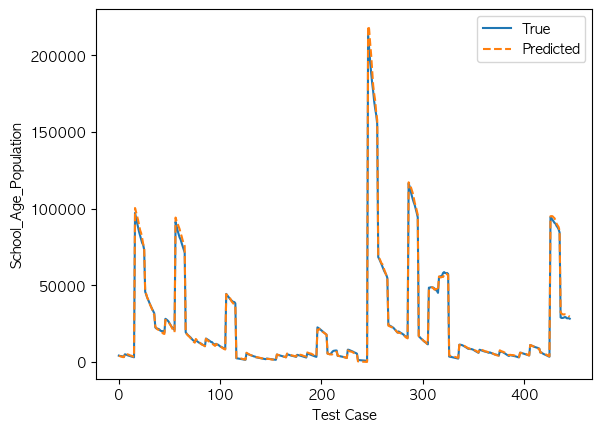

Mean Squared Error: 2667072.74
Mean Absolute Percentage Error (MAPE): 6.93%


In [21]:
# 예측
predicted_data = model.predict(X_test)

# 예측 결과 역전환
#predicted_data = scaler.inverse_transform(predicted_data)
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
predicted_data = predicted_data.round()
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_true = invTransform(scaler, y_test, '학령인구(명)', use_cols).reshape(-1, 1)

# 결과 시각화
plt.plot(range(len(y_true)), y_true, label='True')
plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
plt.xlabel('Test Case')
plt.ylabel('School_Age_Population')
plt.legend()
plt.show()

# 모델 평가
mse = mean_squared_error(y_true, predicted_data)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE 계산
mape = calculate_mape(y_true, predicted_data)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

In [22]:
for yt, pr in zip(y_true, predicted_data):
    print(yt, pr)

[4079.] [4042.]
[3907.] [3725.]
[3742.] [3537.]
[3719.] [3366.]
[3436.] [3132.]
[3227.] [3108.]
[4946.] [5425.]
[4758.] [5247.]
[4524.] [5037.]
[4205.] [4865.]
[4004.] [4641.]
[3832.] [4243.]
[3610.] [4057.]
[3371.] [3881.]
[3148.] [3451.]
[2987.] [3183.]
[97138.] [100354.]
[93726.] [97773.]
[90714.] [95317.]
[87724.] [92510.]
[84770.] [89367.]
[82388.] [85957.]
[79820.] [84050.]
[77599.] [80819.]
[76382.] [77058.]
[73209.] [74603.]
[45821.] [46249.]
[43905.] [44334.]
[41954.] [42071.]
[40386.] [40414.]
[38847.] [38985.]
[37377.] [37000.]
[35741.] [35675.]
[34391.] [33930.]
[33097.] [31904.]
[31658.] [30649.]
[22480.] [23068.]
[21781.] [22122.]
[21702.] [21291.]
[21499.] [20895.]
[21145.] [20843.]
[20363.] [20468.]
[20137.] [19867.]
[20079.] [18922.]
[19752.] [18390.]
[19237.] [18201.]
[28082.] [27406.]
[27633.] [26706.]
[27087.] [26118.]
[26388.] [25892.]
[25192.] [25009.]
[23863.] [24050.]
[22947.] [22815.]
[22208.] [21406.]
[21515.] [19999.]
[20787.] [19382.]
[91345.] [94124.]
[8867

In [23]:
prediction_df = df[df['연도'].isin([i for i in range(2020, 2033)])]

In [24]:
prediction_df

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
2230,2230,서울특별시,종로구,2020,0.217087,0.120678,0.161976,0.096336,0.209837,0.130965,0.186450,0.072376,185378.596803,서울특별시 종로구
2231,2231,서울특별시,중구,2020,0.199966,0.106739,0.153548,0.107868,0.190367,0.140219,0.182978,0.047504,173271.344077,서울특별시 중구
2232,2232,서울특별시,용산구,2020,0.280971,0.105505,0.182054,0.146043,0.249111,0.199853,0.221679,0.105554,239314.108310,서울특별시 용산구
2233,2233,서울특별시,성동구,2020,0.326864,0.173432,0.231264,0.200514,0.280087,0.240111,0.270473,0.140553,276868.031364,서울특별시 성동구
2234,2234,서울특별시,광진구,2020,0.376061,0.194800,0.249353,0.177561,0.298873,0.257238,0.289277,0.176815,315205.005284,서울특별시 광진구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2894,경상남도,함양군,2022,0.064588,0.081208,0.151729,0.023927,0.154601,0.026867,0.051624,0.014050,60416.879228,경상남도 함양군
2895,2895,경상남도,거창군,2022,0.085519,0.101479,0.186446,0.032853,0.178583,0.036594,0.066856,0.032195,76603.424826,경상남도 거창군
2896,2896,경상남도,합천군,2022,0.075913,0.096920,0.185930,0.028574,0.194827,0.030222,0.061971,0.010966,70653.241497,경상남도 합천군
2897,2897,제주특별자치도,제주시,2022,0.396668,0.380215,0.664569,0.218145,0.507577,0.234878,0.428296,0.343861,318429.480836,제주특별자치도 제주시


In [25]:
# 시퀀스 데이터 생성
def create_sequence_data1(data, sequence_length):
    sequences = []
    regions = []
    year = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        year.extend([i for i in range(2023, 2033+1)])
        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length+1):
            regions.append(region)
            seq = temp_df[i:i+sequence_length]
            sequences.append(seq)
    return np.array(sequences), np.array(regions), np.array(year)

In [26]:
X_sequences, r, y = create_sequence_data1(prediction_df, sequence_length)

In [27]:
X_sequences

array([[[0.21708723, 0.12067784, 0.16197625, ..., 0.13096511,
         0.18645042, 0.07237575],
        [0.21253577, 0.11544739, 0.16253379, ..., 0.11173634,
         0.15762661, 0.06836676],
        [0.2095006 , 0.11502788, 0.16282983, ..., 0.11087504,
         0.14788161, 0.0646867 ]],

       [[0.19996607, 0.10673923, 0.15354821, ..., 0.14021872,
         0.18297804, 0.04750353],
        [0.19678397, 0.10610209, 0.15413297, ..., 0.12336474,
         0.16714075, 0.0447733 ],
        [0.19461887, 0.10560127, 0.15444054, ..., 0.11344779,
         0.14637522, 0.04228977]],

       [[0.28097088, 0.10550465, 0.182054  , ..., 0.19985263,
         0.22167947, 0.1055538 ],
        [0.27472157, 0.10485108, 0.18269451, ..., 0.1701276 ,
         0.21254106, 0.09938611],
        [0.27094182, 0.10438801, 0.18299161, ..., 0.16339161,
         0.18368232, 0.0943615 ]],

       ...,

       [[0.07831915, 0.09848835, 0.1856977 , ..., 0.03244722,
         0.07412421, 0.01340444],
        [0.07699916, 

In [ ]:
r

array(['강원특별자치도 강릉시', '강원특별자치도 강릉시', '강원특별자치도 강릉시', ..., '충청북도 충주시',
       '충청북도 충주시', '충청북도 충주시'], dtype='<U12')

In [28]:
X_sequences[1]

array([[0.19996607, 0.10673923, 0.15354821, 0.10786825, 0.19036685,
        0.14021872, 0.18297804, 0.04750353],
       [0.19678397, 0.10610209, 0.15413297, 0.101199  , 0.20865862,
        0.12336474, 0.16714075, 0.0447733 ],
       [0.19461887, 0.10560127, 0.15444054, 0.09550764, 0.2303233 ,
        0.11344779, 0.14637522, 0.04228977]])

In [29]:
# 예측
predicted_data = model.predict(X_sequences)

7/7 [==============================] - 0s 13ms/step


In [30]:
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [31]:
predicted_data.round()

array([[ 1.67860e+04],
       [ 1.15840e+04],
       [ 2.41460e+04],
       [ 3.19520e+04],
       [ 3.97950e+04],
       [ 3.75260e+04],
       [ 3.91230e+04],
       [ 5.68710e+04],
       [ 3.10420e+04],
       [ 3.70300e+04],
       [ 7.33320e+04],
       [ 5.57500e+04],
       [ 3.72770e+04],
       [ 4.41390e+04],
       [ 7.15610e+04],
       [ 6.52110e+04],
       [ 4.60380e+04],
       [ 2.22580e+04],
       [ 3.74260e+04],
       [ 4.32310e+04],
       [ 4.26710e+04],
       [ 6.68890e+04],
       [ 8.54160e+04],
       [ 9.08390e+04],
       [ 6.16730e+04],
       [ 3.07900e+03],
       [ 1.36980e+04],
       [ 7.28200e+03],
       [ 1.03160e+04],
       [ 3.72070e+04],
       [ 3.79690e+04],
       [ 3.40250e+04],
       [ 3.52820e+04],
       [ 5.52260e+04],
       [ 3.61870e+04],
       [ 2.66140e+04],
       [ 2.38410e+04],
       [ 2.54920e+04],
       [ 1.78650e+04],
       [ 2.22620e+04],
       [ 2.89740e+04],
       [ 9.24300e+03],
       [ 1.56230e+04],
       [ 6.

In [32]:
predicted_df = pd.DataFrame({'연도': y, '행정구역': r, '학령인구(명)': predicted_data.round().flatten()})

ValueError: All arrays must be of the same length

In [ ]:
predicted_df

,연도,행정구역,학령인구(명)
0,2023,강원특별자치도 강릉시,27126.0
1,2024,강원특별자치도 강릉시,25585.0
2,2025,강원특별자치도 강릉시,23900.0
3,2026,강원특별자치도 강릉시,22519.0
4,2027,강원특별자치도 강릉시,21236.0
...,...,...,...
2448,2029,충청북도 충주시,13591.0
2449,2030,충청북도 충주시,11331.0
2450,2031,충청북도 충주시,9088.0
2451,2032,충청북도 충주시,6852.0


In [ ]:
predicted_df.to_csv('./data/predicted_school_age_population(2023-2033).csv', encoding='utf-8', index=False)